In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import (
    cross_val_score,
    train_test_split,
    GridSearchCV,
)

from skopt import BayesSearchCV

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [9]:
from sklearn.datasets import fetch_california_housing

# Carregar o dataset California Housing
data = fetch_california_housing(as_frame=True)
df = data.frame
X = df.drop("MedHouseVal", axis=1)  # Variáveis preditoras
y = df["MedHouseVal"]              # Variável alvo


In [30]:
data.head()

AttributeError: head

In [10]:
y.value_counts() / len(y)

MedHouseVal
5.00001    0.046754
1.37500    0.005911
1.62500    0.005669
1.12500    0.004990
1.87500    0.004506
             ...   
3.59200    0.000048
0.54900    0.000048
3.77600    0.000048
0.81200    0.000048
0.47000    0.000048
Name: count, Length: 3842, dtype: float64

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

X_train.shape, X_test.shape

((16512, 8), (4128, 8))

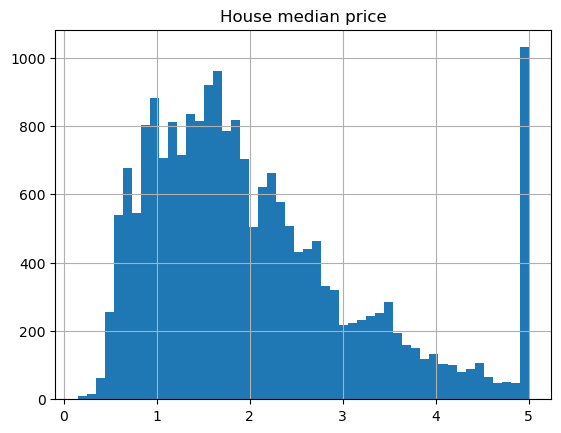

In [12]:
y.hist(bins = 50)
plt.title("House median price")
plt.show()

## Define the model and hyperparameter space


In [13]:
gbm = GradientBoostingRegressor(random_state  =42)

In [22]:
#hyperparameters_space
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'min_samples_split': [2, 4, 6, 8, 10],
    'max_depth': [3, 5, 7, 9, 11],
    'loss' : ['squared_error',  'huber', 'quantile'],
}

In [23]:
import sklearn

In [24]:
search = BayesSearchCV(
    estimator=gbm,
    search_spaces=param_grid,
    n_iter=50,
    random_state=0,
    cv = 5,
    scoring= 'neg_mean_squared_error',
    n_jobs=-4, #usa todos os nucleos disponveis
    refit = True,
)

search.fit(X_train, y_train)

BayesSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
              n_jobs=-4, random_state=0, scoring='neg_mean_squared_error',
              search_spaces={'loss': ['squared_error', 'huber', 'quantile'],
                             'max_depth': [3, 5, 7, 9, 11],
                             'min_samples_split': [2, 4, 6, 8, 10],
                             'n_estimators': [100, 200, 300, 400, 500]})

In [25]:
search.best_params_

OrderedDict([('loss', 'squared_error'),
             ('max_depth', 7),
             ('min_samples_split', 6),
             ('n_estimators', 500)])

In [26]:
search.best_score_

-0.21494394978201728

In [27]:
results = pd.DataFrame(search.cv_results_)
print(results.shape)
results.head()

(50, 17)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_loss,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,33.858483,0.097255,0.036427,0.000767,huber,9,8,400,"{'loss': 'huber', 'max_depth': 9, 'min_samples...",-0.241330,-0.213378,-0.235924,-0.212384,-0.217270,-0.224057,0.012129,18
1,25.191200,0.017452,0.036319,0.000725,squared_error,11,10,300,"{'loss': 'squared_error', 'max_depth': 11, 'mi...",-0.261128,-0.237214,-0.260101,-0.219166,-0.222768,-0.240075,0.017828,31
2,2.733237,0.015472,0.004860,0.000373,huber,3,4,100,"{'loss': 'huber', 'max_depth': 3, 'min_samples...",-0.303403,-0.286887,-0.306147,-0.277551,-0.287647,-0.292327,0.010803,45
3,20.914727,0.033298,0.030177,0.001370,squared_error,9,6,300,"{'loss': 'squared_error', 'max_depth': 9, 'min...",-0.243957,-0.217534,-0.236624,-0.209968,-0.214630,-0.224542,0.013287,19
4,7.972136,0.009335,0.011847,0.000400,squared_error,5,8,200,"{'loss': 'squared_error', 'max_depth': 5, 'min...",-0.239040,-0.225430,-0.247853,-0.217232,-0.221208,-0.230152,0.011503,24


ConversionError: Failed to convert value(s) to axis units: array([OrderedDict({'loss': 'squared_error', 'max_depth': 7, 'min_samples_split': 6, 'n_estimators': 500}),
       OrderedDict({'loss': 'squared_error', 'max_depth': 7, 'min_samples_split': 6, 'n_estimators': 400}),
       OrderedDict({'loss': 'huber', 'max_depth': 7, 'min_samples_split': 10, 'n_estimators': 500}),
       OrderedDict({'loss': 'squared_error', 'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 500}),
       OrderedDict({'loss': 'huber', 'max_depth': 7, 'min_samples_split': 10, 'n_estimators': 400}),
       OrderedDict({'loss': 'squared_error', 'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 400}),
       OrderedDict({'loss': 'huber', 'max_depth': 7, 'min_samples_split': 8, 'n_estimators': 500}),
       OrderedDict({'loss': 'huber', 'max_depth': 7, 'min_samples_split': 4, 'n_estimators': 400}),
       OrderedDict({'loss': 'huber', 'max_depth': 7, 'min_samples_split': 10, 'n_estimators': 300}),
       OrderedDict({'loss': 'huber', 'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 400})],
      dtype=object)

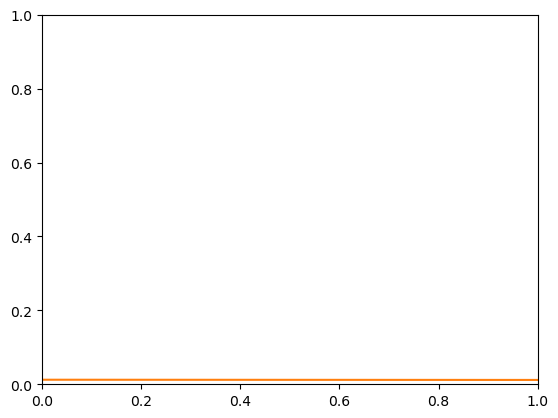

In [ ]:
#ORder the differente moidels based on their performance

results.sort_values(by='mean_test_score', ascending=False, inplace=True)
results.reset_index(drop=True, inplace=True)
results[['mean_test_score', 'std_test_score', 'mean_fit_time', 'params']].head(10)
plt.xlabel('mean_test_score')
plt.ylabel('std_test_score')

In [29]:
X_train_preds = search.predict(X_train)
X_test_preds = search.predict(X_test)

train_mse = mean_squared_error(y_train, X_train_preds)
test_mse = mean_squared_error(y_test, X_test_preds)

print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')

Train MSE: 0.02577921274036749
Test MSE: 0.20019122376119622
